In [35]:
import pgmpy
import pandas as pd
import matplotlib.pyplot as plt
#import dataset
data=pd.read_csv("spotifyData.csv")
#drop first column
data=data.drop(data.columns[0],axis=1)
data.head()

,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo,genre,like
0,0.754,0.813,-5.400,0.071,0.00007,0.955,98.457,4,1
1,0.546,0.793,-5.753,0.334,0.37800,0.516,104.161,11,1
2,0.212,0.561,-14.217,0.800,0.00457,0.257,76.257,11,1
3,0.504,0.934,-6.802,0.536,0.84500,0.897,117.850,11,1
4,0.667,0.519,-14.370,0.329,0.42100,0.604,99.526,9,1


Discretize values

In [36]:
#integer casting of tempo and loudness
data['tempo']=data['tempo'].apply(lambda x: int(x))
data['loudness']=data['loudness'].apply(lambda x: int(x))
#discretize all percentages (danceability, energy, acousticness and valence, instrumentalness)
#multiply them by 100 and floor
data['danceability']=data['danceability'].apply(lambda x: int(x*100))
data['energy']=data['energy'].apply(lambda x: int(x*100))
data['acousticness']=data['acousticness'].apply(lambda x: int(x*100))
data['valence']=data['valence'].apply(lambda x: int(x*100))
data['instrumentalness']=data['instrumentalness'].apply(lambda x: int(x*100))


data.head()

,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo,genre,like
0,75,81,-5,7,0,95,98,4,1
1,54,79,-5,33,37,51,104,11,1
2,21,56,-14,80,0,25,76,11,1
3,50,93,-6,53,84,89,117,11,1
4,66,51,-14,32,42,60,99,9,1


In [37]:
#create model in pgmpy
from pgmpy.models import BayesianModel

Creating a custom model based on the description of variables from the API's documentation, and personal intuition.

In [38]:
no_genre_data = data.drop(['genre'], axis=1)
custom_model = BayesianModel([('loudness', 'energy'), ('tempo', 'energy'),
                                ('energy', 'valence'), ('danceability', 'valence'),
                              ('valence', 'like'), ('acousticness', 'like'),('instrumentalness', 'like')])


/home/danielenapo/.local/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


Learn parameters

In [39]:
from pgmpy.estimators import MaximumLikelihoodEstimator
custom_model.fit(no_genre_data, estimator=MaximumLikelihoodEstimator)

## Inference

In [40]:
import seaborn as sns

<AxesSubplot: >

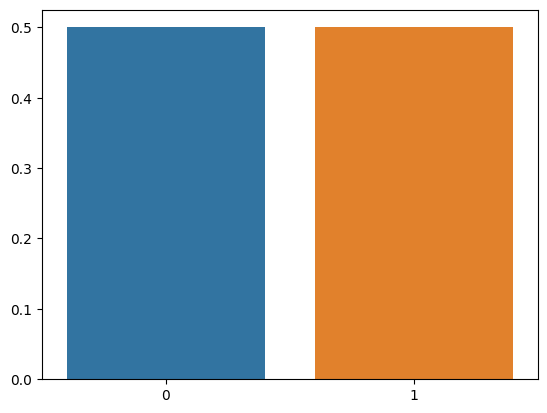

In [58]:
# make inference
from pgmpy.inference import VariableElimination
infer = VariableElimination(custom_model)
# query for the probability that i like a song given that the tempo is less than 100
q = infer.query(variables=['like'], evidence={'tempo': 130, 'acousticness':10, 'valence':10}, joint=False)
# barplot with seaborn
sns.barplot(x=[0,1], y=q['like'].values)

In [59]:
print(q['like'].values)

[0.5 0.5]
